In [1]:
!nvidia-smi

Mon May 17 04:14:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz

--2021-05-17 04:14:50--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.84.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.84.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99003388 (94M) [application/x-tar]
Saving to: ‘imagenette2-160.tgz’

imagenette2-160.tgz 100%[===================>]  94.42M  35.1MB/s    in 2.7s    

2021-05-17 04:14:53 (35.1 MB/s) - ‘imagenette2-160.tgz’ saved [99003388/99003388]



In [3]:
!tar -xvzf imagenette2-160.tgz


Streaming output truncated to the last 5000 lines.
imagenette2-160/train/n03888257/n03888257_16077.JPEG
imagenette2-160/train/n03888257/n03888257_23339.JPEG
imagenette2-160/train/n03888257/n03888257_44204.JPEG
imagenette2-160/train/n03888257/n03888257_61633.JPEG
imagenette2-160/train/n03888257/n03888257_15067.JPEG
imagenette2-160/train/n03888257/n03888257_75365.JPEG
imagenette2-160/train/n03888257/n03888257_63966.JPEG
imagenette2-160/train/n03888257/n03888257_3927.JPEG
imagenette2-160/train/n03888257/n03888257_20684.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-160/train/n03888257/n03888257_14016.JPEG
imagenette2-160/train/n03888257/n03888257_37776.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-160/train/n03888257/n03888257_17513.JPEG
imagenette2-160/train/n03888257/n03888257_17143.JPEG
imagenette2-160/train/n03888257/n03888257_6738.JPEG
imagenette2-160/train/n03888257/n03888257_4355.JPEG
imagenette2-160/train/n03888257/ILS

In [4]:
!mkdir data -p
!mv ./imagenette2-160/ ./data/

In [25]:
import tensorflow as tf\
    , glob, os, numpy as np, PIL, matplotlib.pyplot as plt

# Bring the train and test data in the required format.

In [45]:
def norm(arr):
    "Convert and array with range 0,255 to -1,1"
    return (arr - 127)/128

def denorm(arr):
    "Convert and array with range -1,1 to 0,255"
    return (arr*128)+127

train_dl = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=norm,
    # rescale=1./255.
    
).flow_from_directory(
    'data/imagenette2-160/train',
    target_size=(160, 160)
)
valid_dl = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255.,
    preprocessing_function=norm,
).flow_from_directory(
    'data/imagenette2-160/val',
    shuffle=False,
    target_size=(160, 160)
)

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [7]:
x_batch, y_batch = next(train_dl)

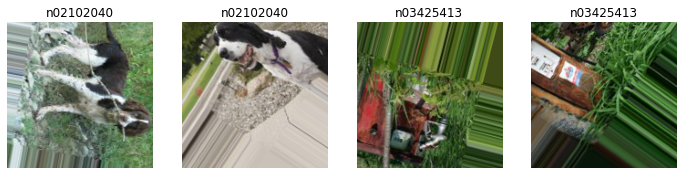

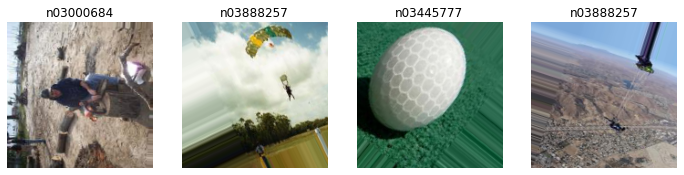

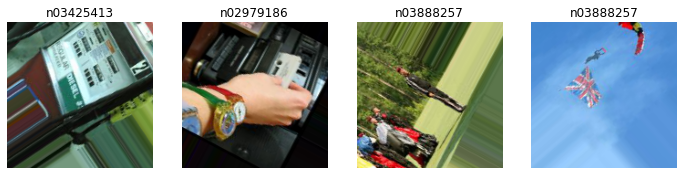

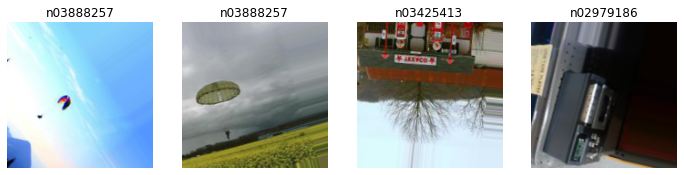

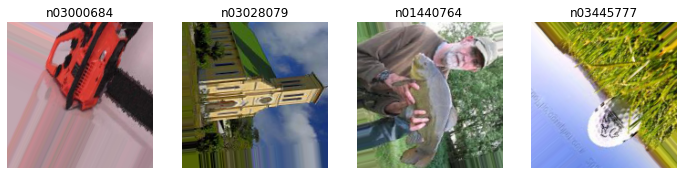

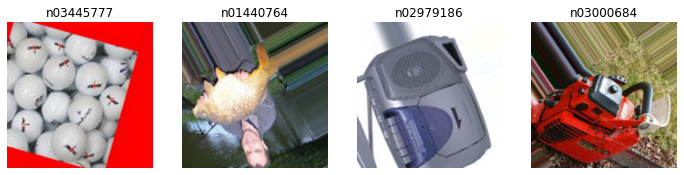

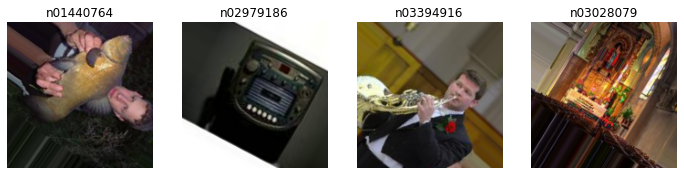

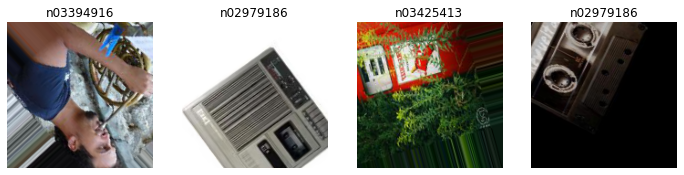

In [8]:
i = 0
cols=4
reverse_class_maping = {j:i for i,j in train_dl.class_indices.items()}
while True:
    if i>=x_batch.shape[0]:
        break
    _, axs = plt.subplots(1, cols, figsize=(3*cols, 3))
    for ii in range(cols):
        if i>=x_batch.shape[0]:
            break
        arr = denorm(x_batch[i]).astype('ubyte')
        axs[ii].imshow(arr)
        axs[ii].set_title(reverse_class_maping[y_batch[i].argmax()])
        axs[ii].axis("off")
        i+=1
    plt.show()

In [9]:
from tensorflow.keras import layers

In [10]:
# reg = tf.keras.regularizers.l2()

# model_layers = [
#     # Layer 1
#     layers.Conv2D(32, 3, 2, 'same', activation='relu', kernel_regularizer=reg, input_shape=x_batch.shape[1:], data_format="channels_last"),
#     layers.BatchNormalization(),
    
#     # Layer 2
#     layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=reg),
#     layers.BatchNormalization()
# ]

# ## Add Dense Layers
# for size in [
#     128,
#     256,
#     # 512,
#     # 768
# ]:
#     model_layers.extend([
#         layers.Conv2D(size, 3, padding='same', activation='relu', kernel_regularizer=reg),
#         layers.BatchNormalization(),
#         #
#         layers.Conv2D(size, 3, padding='same', activation='relu', kernel_regularizer=reg),
#         layers.BatchNormalization(),
#         #
#         layers.Conv2D(size, 3, 2, padding='same', activation='relu', kernel_regularizer=reg),
#         layers.BatchNormalization()
#     ])

# model = tf.keras.Sequential([
#     *model_layers,
    
#     # Last Block where actual inferencing happens
#     # layers.GlobalAveragePooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.5),
#     layers.Dense(len(train_dl.class_indices), 'softmax', kernel_regularizer=reg)
# ])

In [11]:
reg = tf.keras.regularizers.l2()
reg = None
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, 2, padding='same', input_shape=x_batch.shape[1:], data_format="channels_last", kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(32, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(64, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(128, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Dropout(0.4),
  layers.Dense(len(train_dl.class_indices), kernel_regularizer=reg)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        1

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.003),
    loss=tf.keras.losses.BinaryCrossentropy(True),
    metrics=['accuracy']
)

In [24]:
%%time
pass

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [14]:
history = model.fit_generator(
    train_dl,
    epochs=50,
    validation_data=valid_dl
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
296/296 [==============================] - 92s 200ms/step - loss: 0.3867 - accuracy: 0.2065 - val_loss: 0.2773 - val_accuracy: 0.3529
Epoch 2/50
296/296 [==============================] - 59s 198ms/step - loss: 0.2768 - accuracy: 0.3538 - val_loss: 0.2708 - val_accuracy: 0.3758
Epoch 3/50
296/296 [==============================] - 58s 196ms/step - loss: 0.2658 - accuracy: 0.3876 - val_loss: 0.2557 - val_accuracy: 0.4252
Epoch 4/50
296/296 [==============================] - 58s 195ms/step - loss: 0.2576 - accuracy: 0.4087 - val_loss: 0.2394 - val_accuracy: 0.4589
Epoch 5/50
296/296 [==============================] - 58s 195ms/step - loss: 0.2525 - accuracy: 0.4251 - val_loss: 0.2704 - val_accuracy: 0.3893
Epoch 6/50
296/296 [==============================] - 58s 195ms/step - loss: 0.2480 - accuracy: 0.4451 - val_loss: 0.2713 - val_accuracy: 0.4094
Epoch 7/50
296/296 [==============================] - 57s 194ms/step - loss: 0.2406 - accuracy: 0.4656 - val_loss: 0.2253 - val_ac

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 80, 80, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 80, 80, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        1

In [16]:
model.save('v1_50e')

INFO:tensorflow:Assets written to: v1_50e/assets


In [18]:
!zip -r v1_50e.zip v1_50e

  adding: v1_50e/ (stored 0%)
  adding: v1_50e/variables/ (stored 0%)
  adding: v1_50e/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: v1_50e/variables/variables.index (deflated 72%)
  adding: v1_50e/saved_model.pb (deflated 90%)
  adding: v1_50e/assets/ (stored 0%)


In [22]:
model.save_weights('v1_50e_w')

In [28]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [44]:
h = f"""
-- Final Model Metrics: 
> Training Loss: {history.history['loss'][-1]:0.3f}     | Validation Loss: {history.history['val_loss'][-1]:0.3f} 
> Training Accuracy: {history.history['accuracy'][-1]:0.3f} | Validation Accuracy: {history.history['val_accuracy'][-1]:0.3f} 
"""
print(h)


-- Final Model Metrics: 
> Training Loss: 0.166     | Validation Loss: 0.188 
> Training Accuracy: 0.666 | Validation Accuracy: 0.609 



In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(valid_dl)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [55]:

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [60]:
print('Confusion Matrix')
cm = confusion_matrix(valid_dl.classes, y_pred)
print(cm)

Confusion Matrix
[[255   1   4  25  60   4   3  11  18   6]
 [ 16 192  10  49  46   4   4  45  20   9]
 [  1   0 258   6  12   5   3  65   4   3]
 [  6   5  22 138  64  10   3 108  16  14]
 [  1   2  15   1 291  17   3  49   8  22]
 [  6   2  19   3  60 228   1  68   3   4]
 [  0   1  27  22  76   8 145 105   2   3]
 [  2   0  20  11  37   7   5 326   5   6]
 [ 13   5  13   7  39   2   2  35 257  26]
 [  7   0   5   9  13   4   9  29  13 301]]


In [59]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

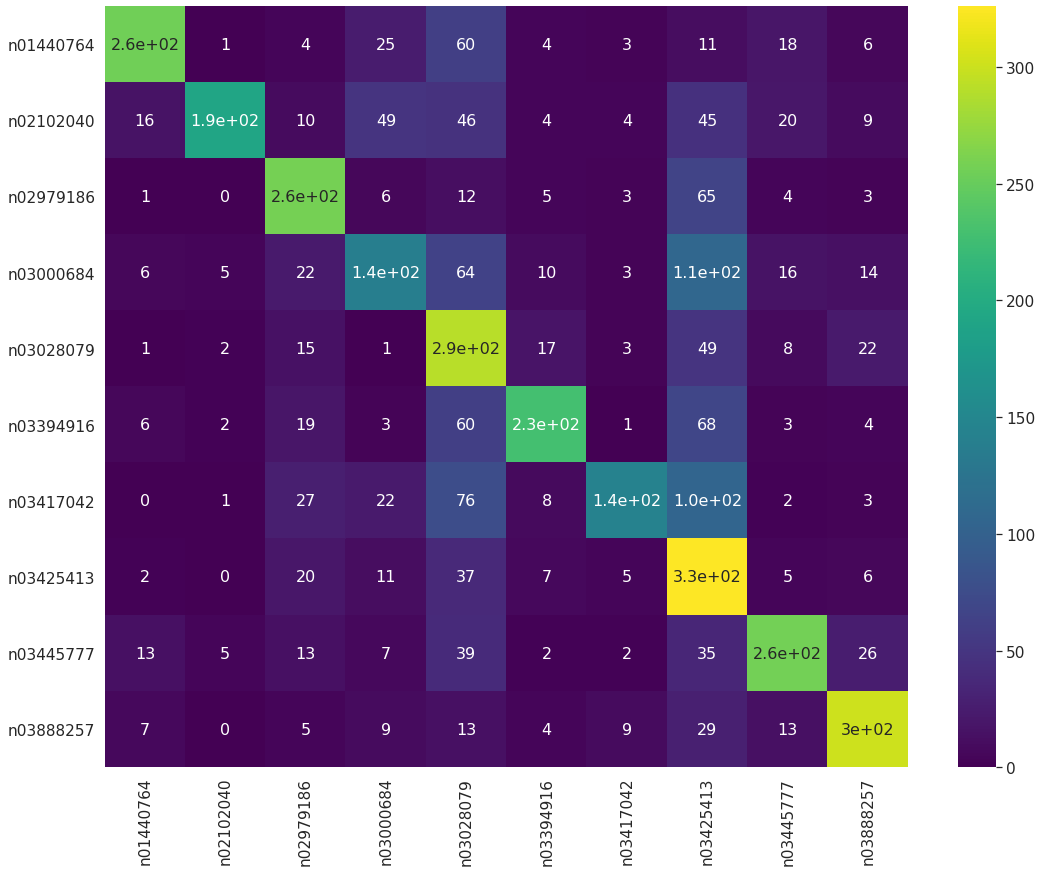

In [94]:
df_cm = pd.DataFrame(cm, valid_dl.class_indices.keys(), valid_dl.class_indices.keys())
plt.figure(figsize=(18,14))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, cmap='viridis', annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [97]:
rep = classification_report(valid_dl.classes, y_pred, None, valid_dl.class_indices.keys())
print(rep)

              precision    recall  f1-score   support

   n01440764       0.83      0.66      0.73       387
   n02102040       0.92      0.49      0.64       395
   n02979186       0.66      0.72      0.69       357
   n03000684       0.51      0.36      0.42       386
   n03028079       0.42      0.71      0.53       409
   n03394916       0.79      0.58      0.67       394
   n03417042       0.81      0.37      0.51       389
   n03425413       0.39      0.78      0.52       419
   n03445777       0.74      0.64      0.69       399
   n03888257       0.76      0.77      0.77       390

    accuracy                           0.61      3925
   macro avg       0.68      0.61      0.62      3925
weighted avg       0.68      0.61      0.61      3925



In [100]:
If we look at the above classification report, the best performing class is: n03888257 and the worst performing class is n03000684

['data/imagenette2-160/val/n01440764/ILSVRC2012_val_00009111.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00009191.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00017472.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00017700.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00021740.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00029930.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00030740.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00037861.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00045880.JPEG',
 'data/imagenette2-160/val/n01440764/ILSVRC2012_val_00046252.JPEG',
 'data/imagenette2-160/val/n01440764/n01440764_10040.JPEG',
 'data/imagenette2-160/val/n01440764/n01440764_10042.JPEG',
 'data/imagenette2-160/val/n01440764/n01440764_10110.JPEG',
 'data/imagenette2-160/val/n01440764/n01440764_10120.JPEG',
 'data/imagenette2-160/val/n01440764/n01440764_10150.JPEG',
 'data/imagenette2-1

array([[  1.4207392,  -1.6554475,  -7.000018 , ...,  -4.176528 ,
         -7.5260534, -10.954099 ],
       [ -0.7254482,  -3.6180067,  -4.5088644, ...,  -2.4897294,
         -3.216545 ,  -3.6193967],
       [  5.8483906, -11.281573 ,  -4.366928 , ...,  -7.255677 ,
         -7.1298   , -12.926812 ],
       ...,
       [ -6.622402 ,  -4.479926 ,  -4.8268757, ...,  -7.600298 ,
         -4.7038546,   2.4985924],
       [ -5.674661 ,  -3.9567752,  -8.370848 , ...,  -7.9788723,
         -0.6868938,   1.504558 ],
       [ -9.799336 ,  -6.8996816,  -2.2448785, ...,  -1.6846684,
         -6.432557 ,  -6.9301767]], dtype=float32)

In [107]:
Y_pred[mask].argsort()

array([[9, 8, 2, ..., 1, 3, 0],
       [2, 6, 5, ..., 7, 0, 3],
       [9, 6, 5, ..., 2, 4, 0],
       ...,
       [6, 1, 3, ..., 4, 8, 0],
       [9, 6, 2, ..., 8, 3, 0],
       [9, 8, 5, ..., 4, 3, 0]])

In [132]:
conf_ground_truth = np.zeros((valid_dl.n, valid_dl.num_classes), 'float32')
conf_ground_truth[np.arange(valid_dl.n), valid_dl.classes] = 1.
conf_ground_truth

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [140]:
def softmax(x: np.ndarray) -> np.ndarray:
    e_x = np.exp(x - np.max(x, axis=-1)[..., None])
    e_y = e_x.sum(axis=-1)[..., None]
    return e_x / e_y

In [188]:
bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
Y_pred_sft = softmax(Y_pred)
losses = bce(conf_ground_truth,  Y_pred_sft).numpy()
argsrt_losses = losses.argsort()



== Class : n01440764
-- Image: data/imagenette2-160/val/n01440764/n01440764_10462.JPEG


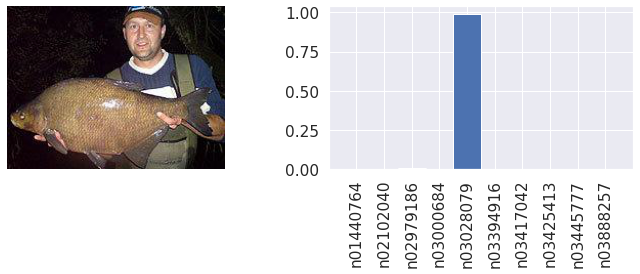

-- Image: data/imagenette2-160/val/n01440764/n01440764_10592.JPEG


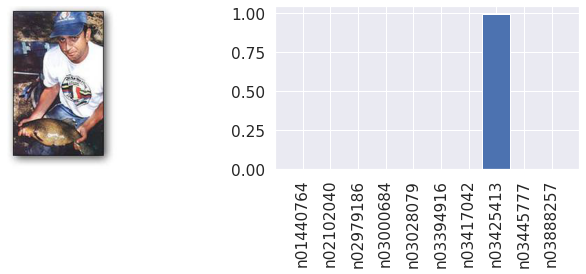



== Class : n02102040
-- Image: data/imagenette2-160/val/n02102040/n02102040_1910.JPEG


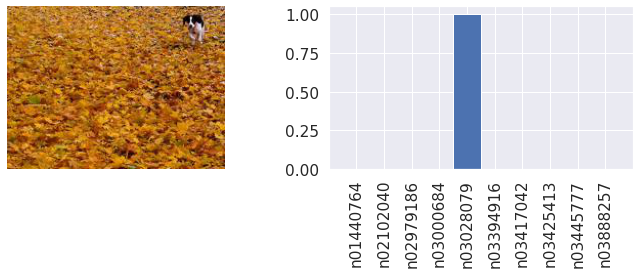

-- Image: data/imagenette2-160/val/n02102040/n02102040_1781.JPEG


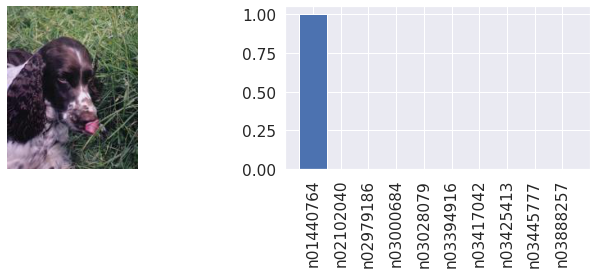



== Class : n02979186
-- Image: data/imagenette2-160/val/n02979186/n02979186_20561.JPEG


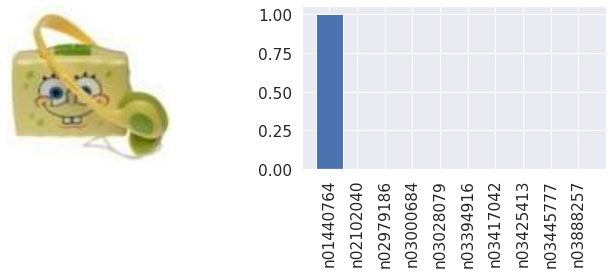

-- Image: data/imagenette2-160/val/n02979186/n02979186_6012.JPEG


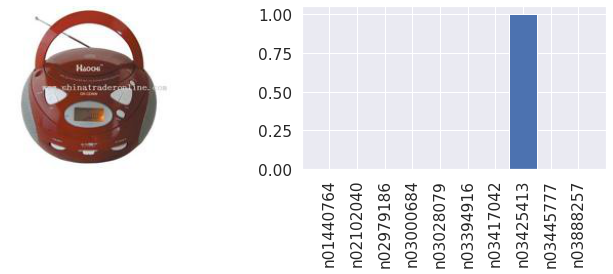



== Class : n03000684
-- Image: data/imagenette2-160/val/n03000684/n03000684_23960.JPEG


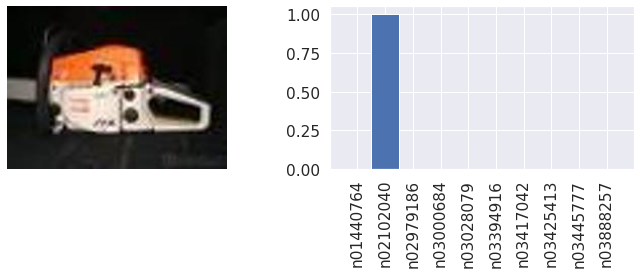

-- Image: data/imagenette2-160/val/n03000684/n03000684_25951.JPEG


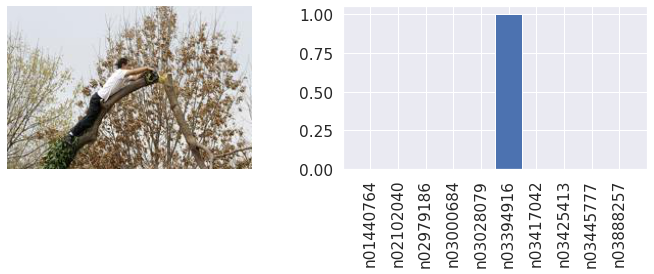



== Class : n03028079
-- Image: data/imagenette2-160/val/n03028079/n03028079_32202.JPEG


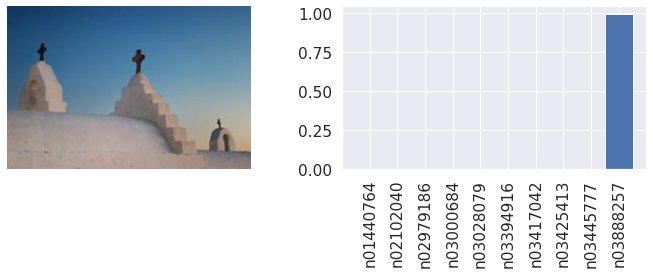

-- Image: data/imagenette2-160/val/n03028079/n03028079_8162.JPEG


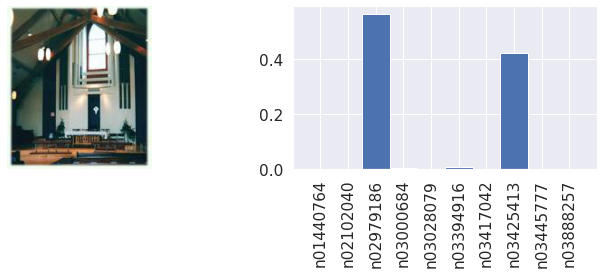



== Class : n03394916
-- Image: data/imagenette2-160/val/n03394916/n03394916_42550.JPEG


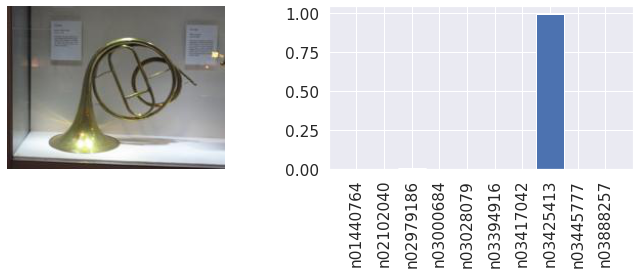

-- Image: data/imagenette2-160/val/n03394916/n03394916_54531.JPEG


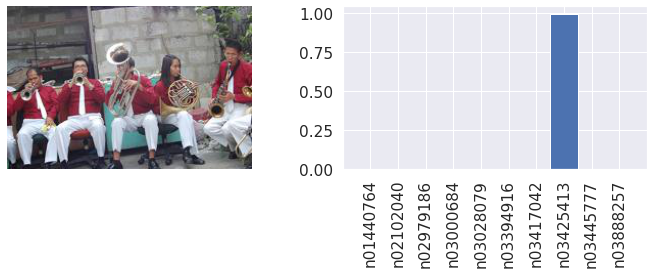



== Class : n03417042
-- Image: data/imagenette2-160/val/n03417042/n03417042_3710.JPEG


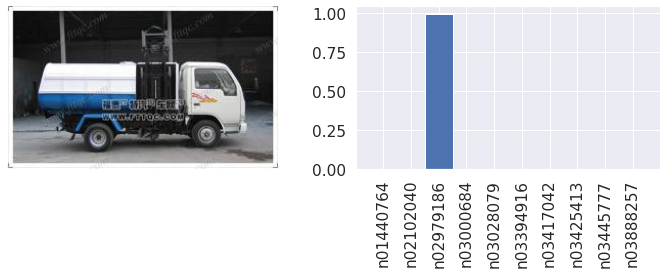

-- Image: data/imagenette2-160/val/n03417042/n03417042_3140.JPEG


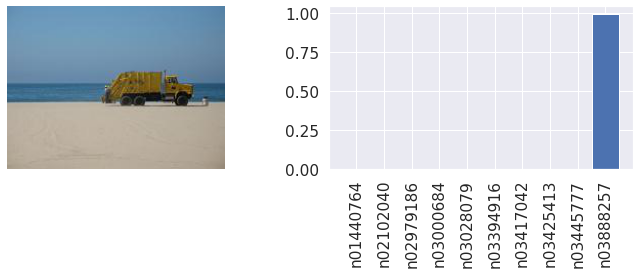



== Class : n03425413
-- Image: data/imagenette2-160/val/n03425413/n03425413_14040.JPEG


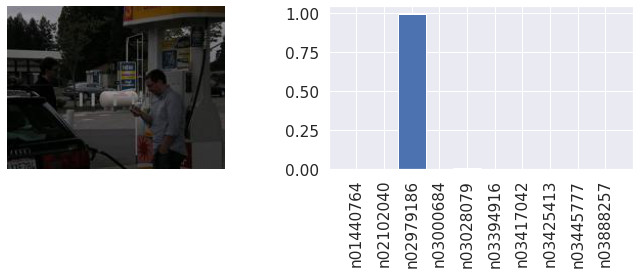

-- Image: data/imagenette2-160/val/n03425413/n03425413_11061.JPEG


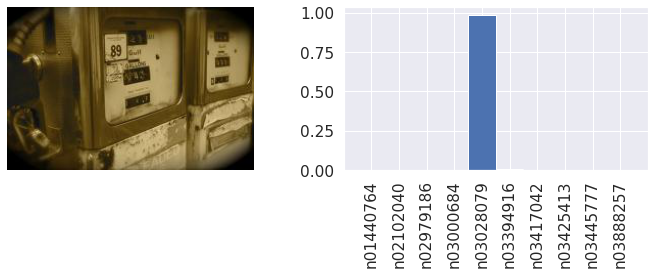



== Class : n03445777
-- Image: data/imagenette2-160/val/n03445777/n03445777_5932.JPEG


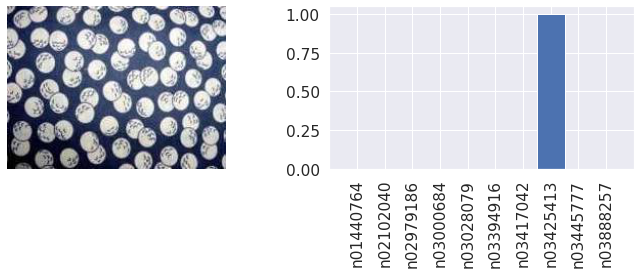

-- Image: data/imagenette2-160/val/n03445777/n03445777_5492.JPEG


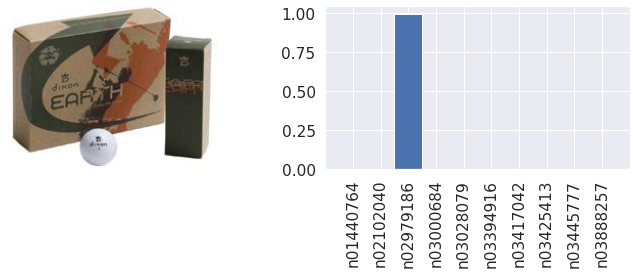



== Class : n03888257
-- Image: data/imagenette2-160/val/n03888257/n03888257_21932.JPEG


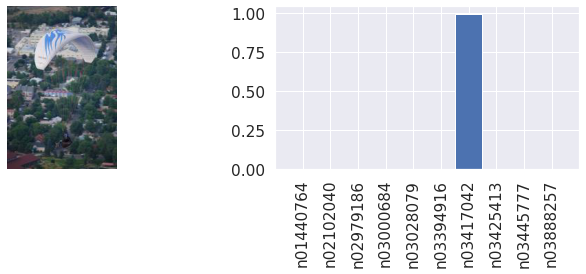

-- Image: data/imagenette2-160/val/n03888257/n03888257_4732.JPEG


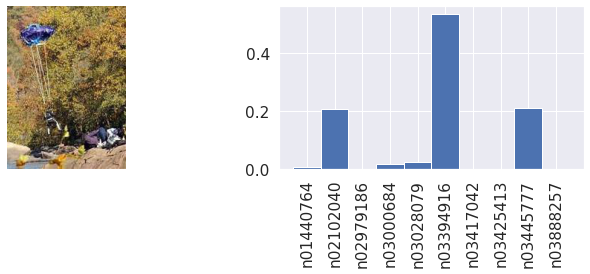

In [256]:
for cn in valid_dl.class_indices:
  print(f"\n\n== Class : {cn}")
  cv = valid_dl.class_indices[cn]
  mask = valid_dl.classes[argsrt_losses] == cv
  for i, ii in enumerate(argsrt_losses[mask][:-3:-1]):
    print(f"-- Image: {valid_dl.filepaths[ii]}")
    _, axs = plt.subplots(1, 2, figsize=(12, 3))
    axs[0].imshow(PIL.Image.open(valid_dl.filepaths[ii]))
    axs[0].axis("off")
    # axs[0].set_title(valid_dl.filepaths[ii])
    #
    # axs[1].axis("off")
    c = ['b']*valid_dl.num_classes
    c[valid_dl.classes[ii]] = 'r'
    axs[1].bar(list(valid_dl.class_indices.keys()), Y_pred_sft[ii], 1, color=c)
    plt.xticks(rotation=90)
    plt.show()
  print("".join(["="]*25))
#

In [259]:
train_dl.batch_size = 64

In [260]:
reg = tf.keras.regularizers.l2()
reg = None
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, 2, padding='same', input_shape=x_batch.shape[1:], data_format="channels_last", kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(32, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(64, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(128, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Dropout(0.4),
  layers.Dense(len(train_dl.class_indices), kernel_regularizer=reg)
])
#
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.003),
    loss=tf.keras.losses.BinaryCrossentropy(True),
    metrics=['accuracy']
)

In [262]:
import time
start = time.time()

history = model.fit_generator(
    train_dl,
    epochs=50,
    validation_data=valid_dl
)

f"-- Total Time Taken to train model: {(time.time() - start)/60:0.3f} Minutes"

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
148/148 [==============================] - 57s 376ms/step - loss: 0.4217 - accuracy: 0.2225 - val_loss: 0.2936 - val_accuracy: 0.2991
Epoch 2/50
148/148 [==============================] - 55s 375ms/step - loss: 0.2849 - accuracy: 0.3369 - val_loss: 0.2606 - val_accuracy: 0.3926
Epoch 3/50
148/148 [==============================] - 55s 375ms/step - loss: 0.2680 - accuracy: 0.3857 - val_loss: 0.3716 - val_accuracy: 0.2617
Epoch 4/50
148/148 [==============================] - 56s 375ms/step - loss: 0.2570 - accuracy: 0.4149 - val_loss: 0.2436 - val_accuracy: 0.4446
Epoch 5/50
148/148 [==============================] - 56s 377ms/step - loss: 0.2519 - accuracy: 0.4304 - val_loss: 0.2857 - val_accuracy: 0.3878
Epoch 6/50
148/148 [==============================] - 55s 375ms/step - loss: 0.2422 - accuracy: 0.4616 - val_loss: 0.2531 - val_accuracy: 0.4354
Epoch 7/50
148/148 [==============================] - 56s 375ms/step - loss: 0.2392 - accuracy: 0.4762 - val_loss: 0.2236 - val_ac

'-- Total Time Taken to train model: 46.301 Minutes'

In [263]:
reg = tf.keras.regularizers.l2()
reg = None
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, 2, padding='same', input_shape=x_batch.shape[1:], data_format="channels_last", kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(32, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Conv2D(64, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Dropout(0.4),
  layers.Conv2D(128, 3, 2, padding='same', kernel_regularizer=reg),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Flatten(),
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation("relu"),
  #
  layers.Dropout(0.5),
  layers.Dense(len(train_dl.class_indices), kernel_regularizer=reg)
])
#
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.003),
    loss=tf.keras.losses.BinaryCrossentropy(True),
    metrics=['accuracy']
)

In [264]:
train_dl.batch_size = 32

In [265]:
import time
start = time.time()

history = model.fit_generator(
    train_dl,
    epochs=50,
    validation_data=valid_dl
)

f"-- Total Time Taken to train model: {(time.time() - start)/60:0.3f} Minutes"

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
296/296 [==============================] - 58s 191ms/step - loss: 0.4048 - accuracy: 0.1952 - val_loss: 0.2911 - val_accuracy: 0.2994
Epoch 2/50
296/296 [==============================] - 57s 191ms/step - loss: 0.2879 - accuracy: 0.3188 - val_loss: 0.2653 - val_accuracy: 0.3738
Epoch 3/50
296/296 [==============================] - 56s 190ms/step - loss: 0.2698 - accuracy: 0.3800 - val_loss: 0.3705 - val_accuracy: 0.2645
Epoch 4/50
296/296 [==============================] - 57s 191ms/step - loss: 0.2619 - accuracy: 0.3998 - val_loss: 0.2483 - val_accuracy: 0.4201
Epoch 5/50
296/296 [==============================] - 57s 191ms/step - loss: 0.2567 - accuracy: 0.4299 - val_loss: 0.2531 - val_accuracy: 0.4257
Epoch 6/50
296/296 [==============================] - 56s 191ms/step - loss: 0.2539 - accuracy: 0.4283 - val_loss: 0.2329 - val_accuracy: 0.4634
Epoch 7/50
296/296 [==============================] - 56s 190ms/step - loss: 0.2483 - accuracy: 0.4443 - val_loss: 0.2208 - val_ac

'-- Total Time Taken to train model: 47.161 Minutes'